### 【問題1】べき乗の算術演算子を使用して作成
####  ポイント：pythonで数式計算

べき乗の算術演算子を使用したプログラムを作ってください。  
雛形として紙を1回折った時の厚さを計算するコードを用意しました。これを43回折った時のコードに書き換えてください。  

《雛形》

```py
"""
紙を1回折った時の厚さを計算するコード
"""

THICKNESS = 0.00008

folded_thickness = THICKNESS*2

print("厚さ： {}メートル".format(folded_thickness))
```

In [10]:
THICKNESS = 0.00008
folded_thickness = THICKNESS * (2**43)
print("厚さ：{}メートル".format(folded_thickness))

厚さ：703687441.77664メートル


### 【問題2】単位の変換

単位がメートルだと実感が湧きづらいので、◯◯万キロメートル に変換して表示させてください。  

サンプルとして ◯◯キロメートル に変換したコードを用意したので、参考にして取り組んでください。小数点以下は2桁まで表示されるようにも指定しています。  

《サンプルコード》
```py
# メートルをキロメートルに変換して小数点以下2桁で表示する
print("厚さ： {:.2f}キロメートル".format(folded_thickness/1000))
```
「月までの距離」を検索して、折った紙が月に届くかどうか確認してみましょう。

In [40]:
print("厚さ：{}キロメートル".format(folded_thickness/1000))
print("厚さ：{:.2f}万キロメートル".format((folded_thickness/1000)/10000))

厚さ：703687.44177664キロメートル
厚さ：70.37万キロメートル


#### 【発展問題①】紙を43回折ったら、月まで届くか？
もし折った紙で月に到達したら、そこから地球を見た感想をお願いします。
- 到達or月を越したら→「ヒューストン、地球はやはり青かったー！」
- 到達できなかったら→「ヒューストン、地球はやはり遠かった。。」
- 地球から月までの距離はおよそ38万kmとする。

In [71]:
moon_distance = 380000
THICKNESS = 0.00008
folded_thickness = THICKNESS * (2**43)
if folded_thickness/1000 >= moon_distance:
    print("「ヒューストン、地球はやはり青かったー！」")
else:
    print("「ヒューストン、地球はやはり遠かった。。」")

「ヒューストン、地球はやはり青かったー！」


### 【問題3】for文を使用して作成
####  ポイント：for文とrangeの使い方

次に、for文を使用したプログラムを作ってください。  

べき乗の算術演算子は使ってはいけません。算術演算子は四則演算（+、-、*、/）のみ使えます。  

《ヒント》

べき乗は以下のように掛け算の繰り返しに置き換えることができます。

$
2^3 = 2 \times 2 \times 2\\
2^5 = 2 \times 2 \times 2 \times 2 \times 2
$



In [55]:
#【問題3】for文を使用して作成

THICKNESS = 0.00008
for i in range(1, 44):
  THICKNESS * (2**i)
print("厚さ：" + str(THICKNESS * (2**i)) + "メートル")

厚さ：703687441.77664メートル


### 【問題4】計算時間の比較
####  ポイント：ベキ乗計算とfor文の計算時間

2つの方法はどちらが正しいわけでもありませんが、コードの良さを評価する際には以下のような着目点があります。

```
計算速度
メモリの使用量
可読性
拡張性
再利用性
```
今回は計算速度を比較してみます。以下の雛形を使用して、2つの方法の計算時間を出力してください。そして、それぞれの計算時間の関係を簡単に説明してください。どちらの書き方が良さそうでしょうか。なお、変数の定義やprint文など、どちらの方法でも使われている部分は除いた範囲の時間を比較してください。

《雛形》

timeモジュールを用いることで現在の時間を取得できます。比較したい箇所の前後の時間の差を計算することで、実行時間を求めます。

```py
import time
start = time.time()
#####
# ここに比較したいコードを貼り付ける
#####
elapsed_time = time.time() - start
print("time : {}[s]".format(elapsed_time))
```



In [73]:
import time

start = time.time()
#####
folded_thickness = THICKNESS * (2**43)
#####
elapsed_time = time.time() - start
print("一般的な冪乗計算のtime : {}[s]".format(elapsed_time))


start = time.time()
#####
for i in range(1, 44):
    THICKNESS * (2**i)
#####
elapsed_time = time.time() - start
print("for文を用いた冪乗計算time : {}[s]".format(elapsed_time))

一般的な冪乗計算のtime : 6.604194641113281e-05[s]
for文を用いた冪乗計算time : 0.00010609626770019531[s]


##### 【結果】一般的なべき乗計算の方が計算速度は早いことが多い（場合によってはfor文の方が早いこともある）

#### 【発展問題②】各計算式をマジックコマンドで計測
- 計算時間の平均を測定して、どちらが早いか改めて比較してみる。

In [67]:
%%timeit
THICKNESS = 0.00008
folded_thickness = THICKNESS * (2**43)

45.6 ns ± 1.58 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


In [62]:
%%timeit
THICKNESS = 0.00008
for i in range(1, 44):
  THICKNESS * (2**i)

11.4 µs ± 425 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


##### 【結果】for構文を用いた方が約４倍ほど計算時間が早い。

### 【問題5】リストへの保存
####  ポイント：リストの概念と使用例

ここまでは43回折った後の最後の値だけを使用していましたが、グラフで可視化するためには過程の値も必要です。for文を使用したコードに、過程の値合計44個を記録するコードを加えてください。

#### 《ヒント》

- 空のリストを作成する。
- 折る前の値をリストに追加する。
- for文の中でn回折った時の値をリストに追加していく。
- 最終的にリストに44個の値が格納されていることをlen関数を用いて確認しておきましょう。

#### （解説）

計算結果をリストの最後尾に加えていきます。

`[-1]`で最後尾が指定できるため、これを計算に使っていきます。

In [77]:
#【問題5】リストへの保存

j = []
THICKNESS = 0.00008
j.append(THICKNESS)
for i in range(1, 44):
  h = THICKNESS * (2**i)
  j.append(h)
print("リスト↓↓")
print(j)
print("「リスト内の要素の数は" + str(len(j)) + "です。」")

リスト↓↓
[8e-05, 0.00016, 0.00032, 0.00064, 0.00128, 0.00256, 0.00512, 0.01024, 0.02048, 0.04096, 0.08192, 0.16384, 0.32768, 0.65536, 1.31072, 2.62144, 5.24288, 10.48576, 20.97152, 41.94304, 83.88608, 167.77216, 335.54432, 671.08864, 1342.17728, 2684.35456, 5368.70912, 10737.41824, 21474.83648, 42949.67296, 85899.34592, 171798.69184, 343597.38368, 687194.76736, 1374389.53472, 2748779.06944, 5497558.13888, 10995116.27776, 21990232.55552, 43980465.11104, 87960930.22208, 175921860.44416, 351843720.88832, 703687441.77664]
「リスト内の要素の数は44です。」


### 【問題6】折れ線グラフの表示
####  ポイント：matplotlibの使用例

グラフの描画には Matplotlib という ライブラリ を用います。リストへ記録するコードの後ろで以下の雛形を使用してください。

#### 《雛形》

```py
"""
グラフを表示する。タイトルと軸ラベル名付き。
"""
import matplotlib.pyplot as plt
%matplotlib inline

plt.title("thickness of folded paper")
plt.xlabel("number of folds")
plt.ylabel("thickness[m]")
plt.plot(リスト名) # 「リスト名」のところにリストの変数名を入れる
plt.show()
```

グラフを表示させた場合はそれに対する考察が重要です。厚さがどのように変化しているかを簡単に説明してください

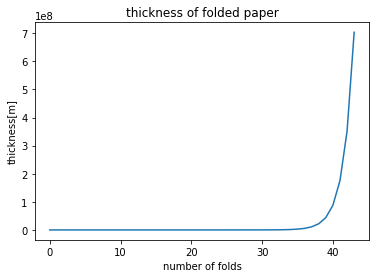

In [79]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.title("thickness of folded paper")
plt.xlabel("number of folds")
plt.ylabel("thickness[m]")
plt.plot(j)
plt.show()

##### 「折る回数が40回を超えたあたりから対数的に増加していく。」

### 【問題7】グラフのカスタマイズ
####  ポイント：リファレンスを見て任意の変更をする。


グラフをより見やすくカスタマイズしてみましょう。カスタマイズしたグラフを最低3種類作成してください。例えば以下のように書き換えることで、線の色を赤に変更できます。

#### 《サンプルコード》
```py
"""
赤い折れ線グラフを表示する。
"""
plt.title("thickness of folded paper")
plt.xlabel("number of folds")
plt.ylabel("thickness[m]")
plt.plot(リスト名, color='red')
plt.show()
```

#### 【問題7】カスタマイズその①：グラフの線を青くする

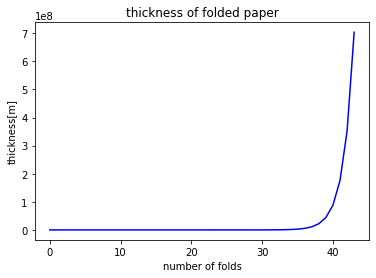

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.title("thickness of folded paper")
plt.xlabel("number of folds")
plt.ylabel("thickness[m]")
plt.plot(j, color='b')
plt.show()

#### 【問題7】カスタマイズその②：カスタマイズその②：グラフのマーカーを正方形に、線を実線、色を黄色にする

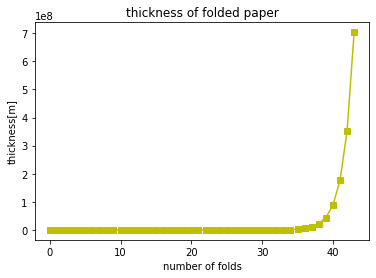

In [80]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.title("thickness of folded paper")
plt.xlabel("number of folds")
plt.ylabel("thickness[m]")
plt.plot(j, 's' '-' 'y')
plt.show()

#### 【問題7-2】カスタマイズその③：ラベルの文字を大きくする

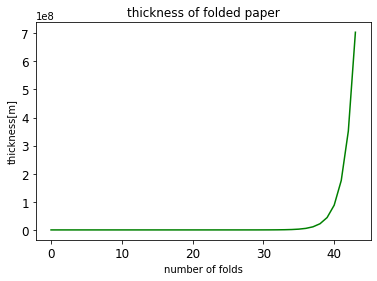

In [93]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.title("thickness of folded paper")
plt.xlabel("number of folds")
plt.ylabel("thickness[m]")
plt.tick_params(labelsize=12)
plt.plot(j, 'g')
plt.show()